# Lecture 07:  Inception Model (we need to go deeper)
Edited by Jiangming Yao 

Date: 09/18/2018

original version by [Magnus Erik Hvass Pedersen] 

## Introduction

- use a pre-trained Deep Neural Network called Inception v3 for image classification.
- The Inception v3 model takes weeks to train on a monster computer with 8 Tesla K40 GPUs and probably costing $30,000 so it is impossible to train it on an ordinary PC.
- The Inception v3 model has nearly 25 million parameters and uses 5 billion multiply-add operations for classifying a single image. 
 
- Inception v3 is a widely-used image recognition model that has been shown to attain greater than 78.1\% accuracy on the ImageNet dataset. 

- The model itself is made up of symmetric and asymmetric building blocks, including convolutions, average pooling, max pooling, concats, dropouts, and fully connected layers. Batchnorm is used extensively throughout the model and applied to activation inputs. Loss is computed via Softmax.


paper: https://arxiv.org/pdf/1512.00567.pdf 

code: https://github.com/tensorflow/models/tree/master/research/inception

## Flowchart

- The Inception model has $\textbf{two}$ softmax-outputs. One is used during training of the neural network and the other is used for classifying images after training has finished, also known as inference.


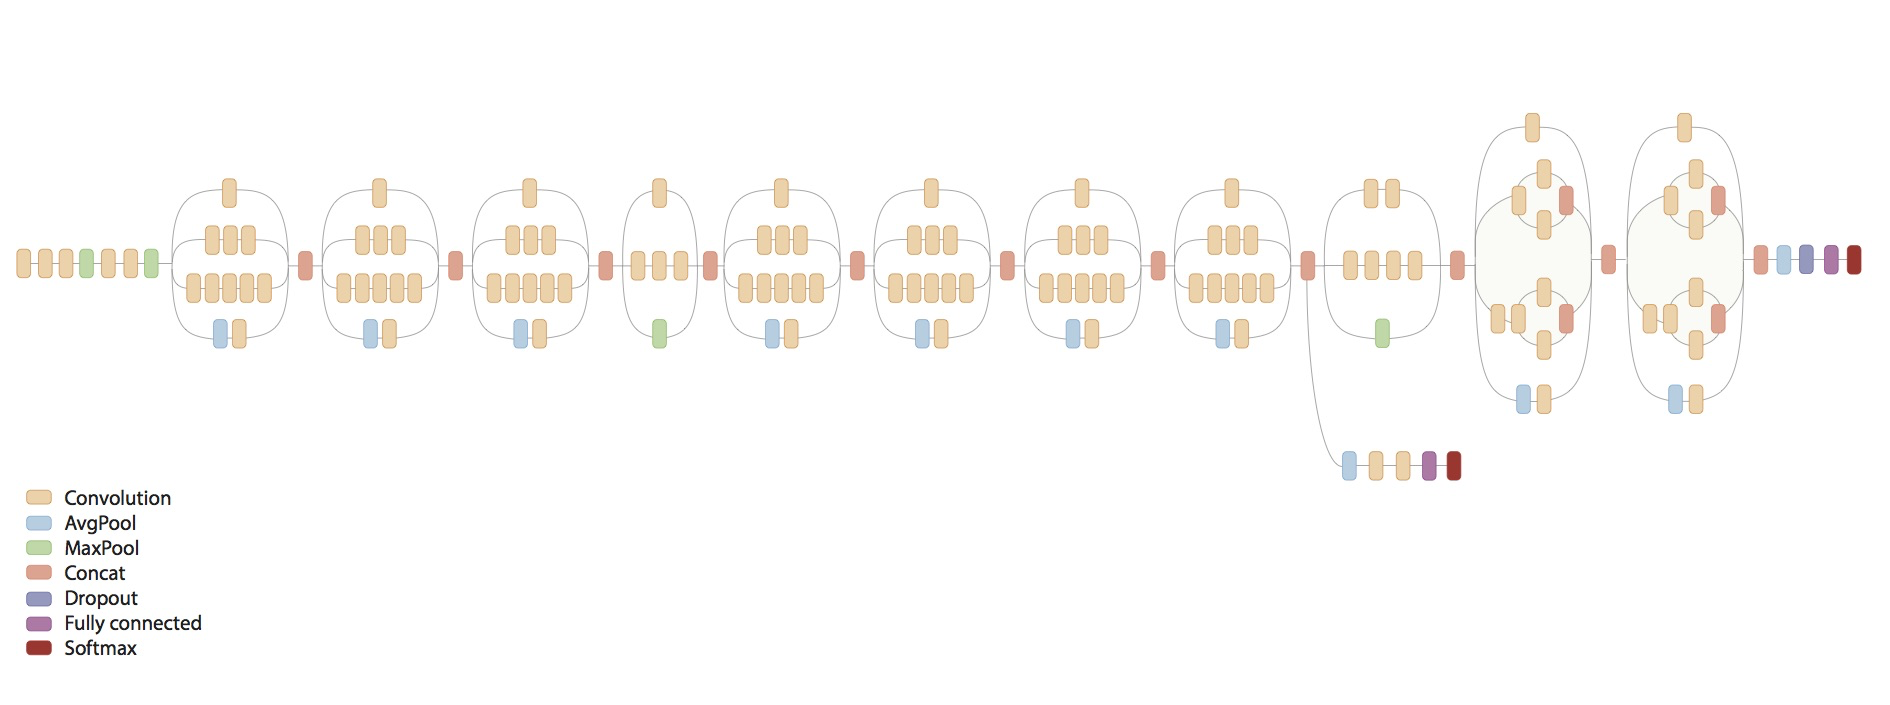

In [8]:
from IPython.display import Image, display
display(Image('images/07_inception_flowchart.png'))

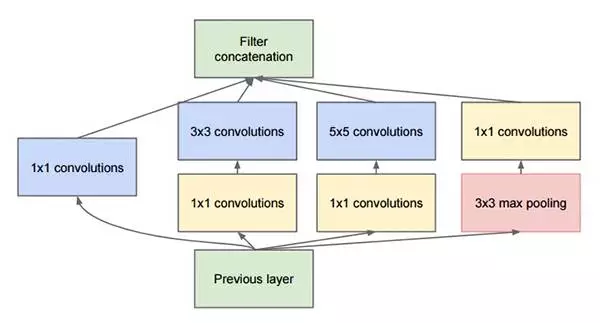

In [38]:
display(Image('../New/Inception.png'))

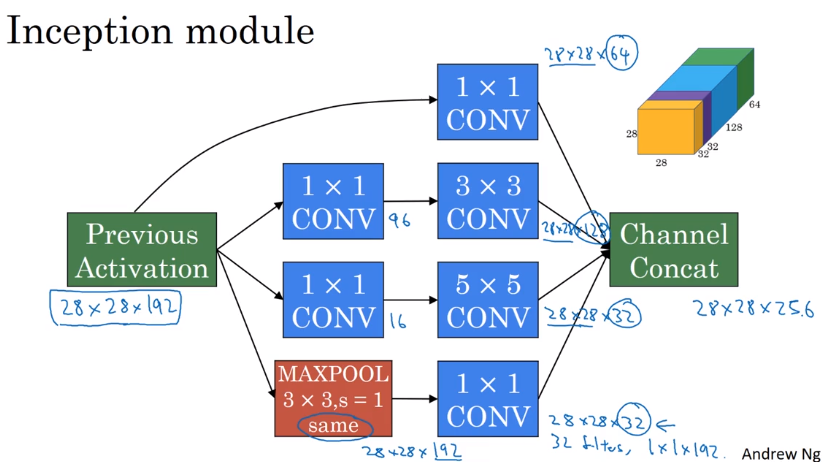

In [41]:
display(Image('../New/Inception_module.png'))

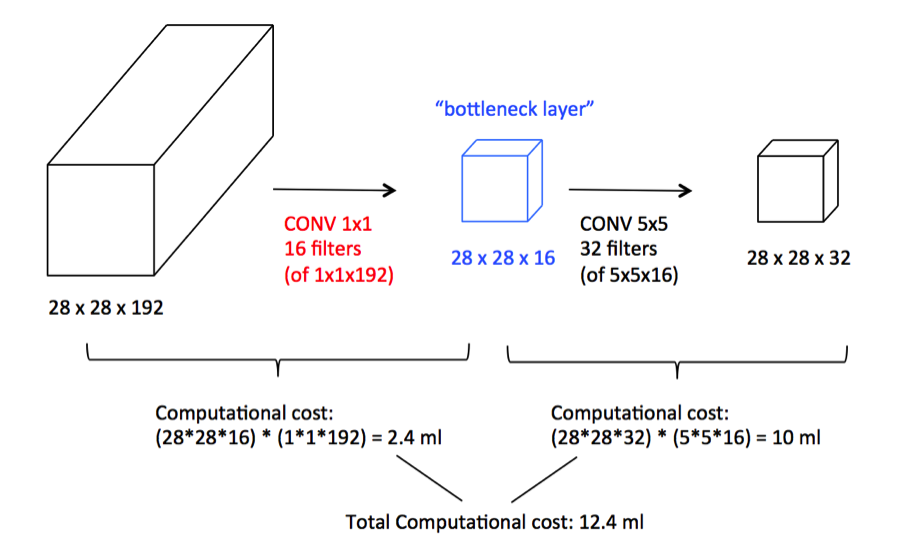

In [42]:
Image('../New/CNN01.png')

## Imports

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import os

# Functions and classes for loading and using the Inception model.
import inception

This was developed using Python 3.5.2 (Anaconda) and TensorFlow version:

## Download the Inception Model

The Inception model is downloaded from the internet. This is the default directory where you want to save the data-files. The directory will be created if it does not exist.

In [4]:
inception.data_dir = 'inception/'

Download the data for the Inception model if it doesn't already exist in the directory. It is 85 MB.

In [5]:
inception.maybe_download()

Data has apparently already been downloaded and unpacked.


## Load the Inception Model

Load the Inception model so it is ready for classifying images.

In [6]:
model = inception.Inception()

## Helper-function for classifying and plotting images

This is a simple wrapper-function for displaying the image, then classifying it using the Inception model and finally printing the classification scores.

In [39]:
def classify(image_path):
    # Display the image.
    display(Image(image_path))

    # Use the Inception model to classify the image.
    pred = model.classify(image_path=image_path)

    # Print the scores and names for the top-10 predictions.
    model.print_scores(pred=pred, k=10, only_first_name=False)    

# cat

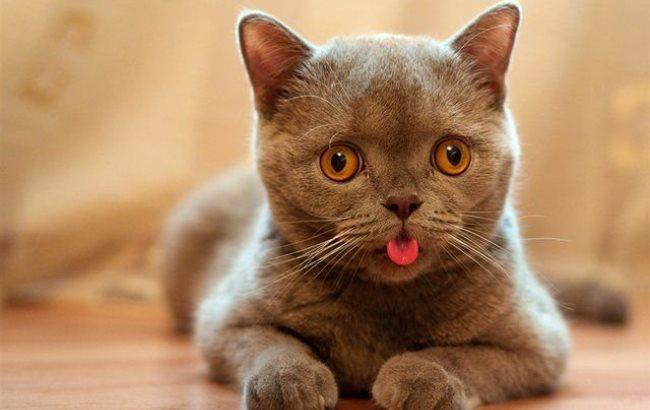

46.81% : Egyptian cat
 4.02% : Siamese cat, Siamese
 1.93% : tabby, tabby cat
 1.76% : bath towel
 1.65% : Persian cat
 0.68% : velvet
 0.58% : teddy, teddy bear
 0.46% : tiger cat
 0.44% : doormat, welcome mat
 0.41% : lynx, catamount


In [40]:
classify('../New/Cat01.jpg')

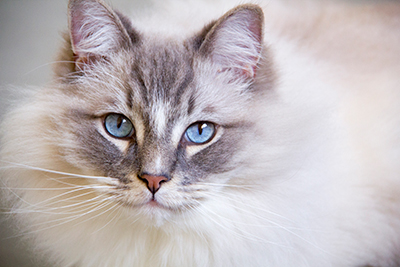

34.87% : tabby
34.04% : lynx
13.96% : Persian cat
 6.37% : tiger cat
 1.33% : Egyptian cat
 0.41% : refrigerator
 0.37% : washbasin
 0.35% : Siamese cat
 0.20% : bathtub
 0.15% : quilt


In [13]:
classify('../New/Cat02.jpg')

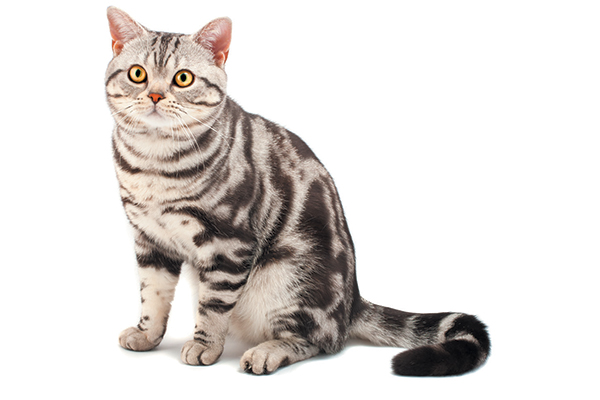

34.00% : Egyptian cat
30.64% : tabby
27.97% : tiger cat
 0.48% : lynx
 0.33% : zebra
 0.26% : tiger
 0.16% : Persian cat
 0.07% : triceratops
 0.05% : Siamese cat
 0.05% : washer


In [15]:
classify('../New/Tabby01.jpg')

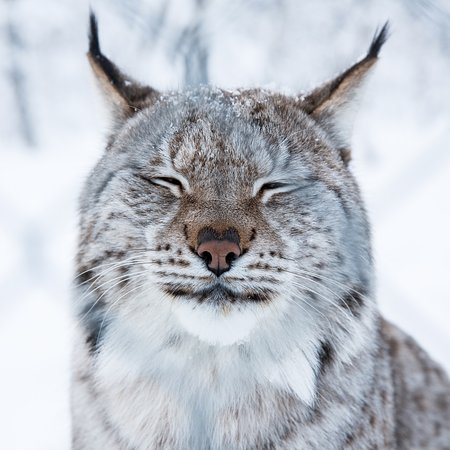

87.52% : lynx
 0.19% : snow leopard
 0.11% : tiger cat
 0.10% : coyote
 0.08% : cheetah
 0.07% : tiger
 0.07% : great grey owl
 0.07% : Bouvier des Flandres
 0.06% : leopard
 0.05% : Tibetan terrier


In [14]:
classify('../New/Lynx01.jpg')

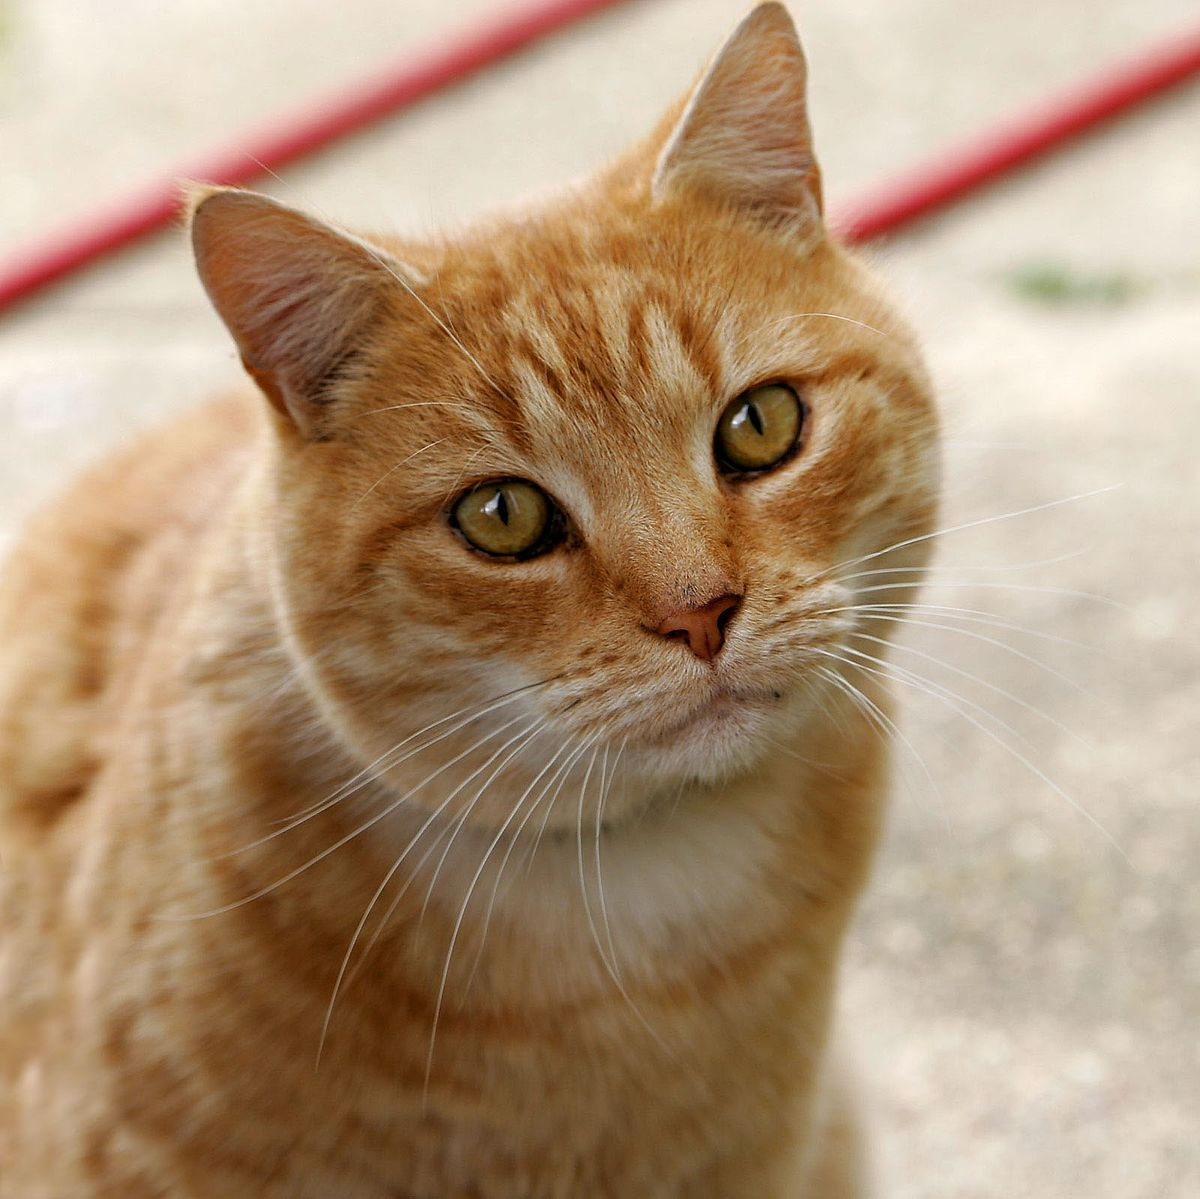

43.41% : tiger cat
32.29% : tabby
18.01% : Egyptian cat
 0.32% : Persian cat
 0.20% : lynx
 0.14% : paper towel
 0.12% : window screen
 0.07% : bath towel
 0.06% : plastic bag
 0.06% : carton


In [11]:
classify('../New/Cat03.jpg')

## Panda

This image of a panda is included in the Inception data-file. The Inception model is quite confident that this image shows a panda, with a classification score of about 89% and the next highest score being only about 0.8% for an indri, which is another exotic animal.

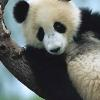

89.11% : giant panda
 0.78% : indri
 0.30% : lesser panda
 0.15% : custard apple
 0.12% : earthstar
 0.09% : sea urchin
 0.05% : forklift
 0.05% : digital watch
 0.05% : gibbon
 0.05% : go-kart


In [8]:
image_path = os.path.join(inception.data_dir, 'cropped_panda.jpg')
classify(image_path)

## Interpretation of Classification Scores

The output of the Inception model is a so-called Softmax-function which was also used in the neural networks in the previous tutorials.

The softmax-outputs are sometimes called probabilities because they are between zero and one, and they also sum to one - just like probabilities. But they are actually not probabilities in the traditional sense of the word, because they do not come from repeated experiments.

It is perhaps better to call the output values of a neural network for classification scores or ranks, because they indicate how strongly the network believes that the input image is of each possible class.

In the above example with the image of a panda, the Inception model gave a very high score of about 89% for the panda-class, and the scores for the remaining 999 possible classes were all below 1%. This means the Inception model was quite certain that the image showed a panda and the remaining scores below 1% should be regarded as noise. For example, the 8th highest score was 0.05% for a digital watch, but this is probably more due to the imprecise nature of neural networks rather than an indication that the image looked slightly like a digital watch.

Sometimes the Inception model is confused about which class an image belongs to, so none of the scores are really high. Examples of this are shown below.

## Parrot (Original Image)

The Inception model is very confident (score about 97%) that this image shows a kind of parrot called a macaw.

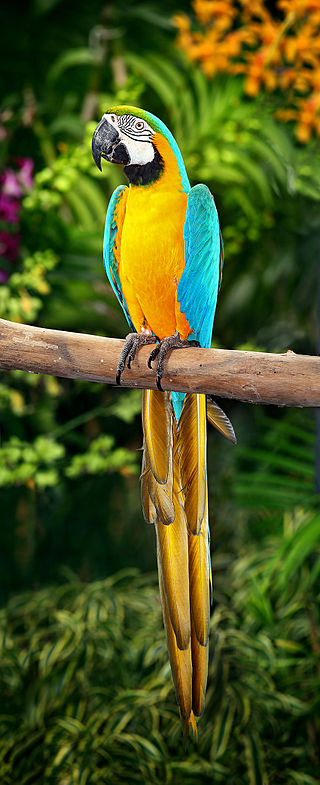

97.18% : macaw
 0.07% : African grey
 0.06% : toucan
 0.05% : jacamar
 0.04% : bee eater
 0.03% : lorikeet
 0.02% : sulphur-crested cockatoo
 0.02% : jay
 0.01% : kite
 0.01% : indigo bunting


In [18]:
classify('images/parrot.jpg')

## Parrot (Resized Image)

The Inception model works on input images that are 299 x 299 pixels in size. The above image of a parrot is actually 320 pixels wide and 785 pixels high, so it is resized automatically by the Inception model.

We now want to see the image after it has been resized by the Inception model.

First we have a helper-function for getting the resized image from inside the Inception model.

In [19]:
def plot_resized_image(image_path):
    # Get the resized image from the Inception model.
    resized_image = model.get_resized_image(image_path=image_path)

    # Plot the image.
    plt.imshow(resized_image, interpolation='nearest')
    
    # Ensure that the plot is shown.
    plt.show()

Now plot the resized image of the parrot. This is the image that is actually input to the neural network of the Inception model. We can see that it has been squeezed so it is square, and the resolution has been reduced so the image has become more pixelated and grainy.

In this case the image still clearly shows a parrot, but some images may become so distorted from this naive resizing that you may want to resize the images yourself before inputting them to the Inception model.

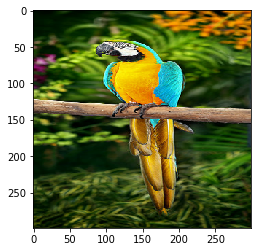

In [20]:
plot_resized_image(image_path="images/parrot.jpg")

## Parrot (Cropped Image, Top)

This image of the parrot has been cropped manually to 299 x 299 pixels and then input to the Inception model, which is still very confident (score about 97%) that it shows a parrot (macaw).

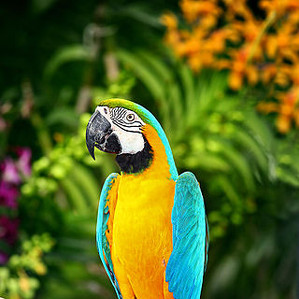

97.52% : macaw
 0.09% : African grey
 0.03% : sulphur-crested cockatoo
 0.02% : toucan
 0.02% : reflex camera
 0.01% : comic book
 0.01% : backpack
 0.01% : bib
 0.01% : vulture
 0.01% : lens cap


In [21]:
classify(image_path="images/parrot_cropped1.jpg")

## Parrot (Cropped Image, Middle)

This is another crop of the parrot image, this time showing its body without the head or tail. The Inception model is still very confident (score about 94%) that it shows a macaw parrot.

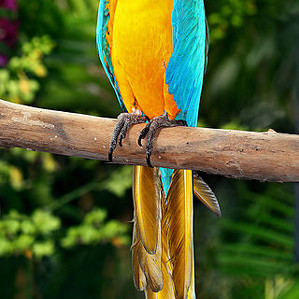

94.21% : macaw
 0.76% : toucan
 0.58% : African grey
 0.11% : jacamar
 0.10% : sulphur-crested cockatoo
 0.10% : bee eater
 0.09% : magpie
 0.08% : jay
 0.06% : lorikeet
 0.04% : hornbill


In [22]:
classify(image_path="images/parrot_cropped2.jpg")

## Parrot (Cropped Image, Bottom)

This image has been cropped so it only shows the tail of the parrot. Now the Inception model is quite confused and thinks the image might show a jacamar (score about 26%) which is another exotic bird, or perhaps the image shows a grass-hopper (score about 10%).

The Inception model also thinks the image might show a fountain-pen (score about 2%). But this is a very low score and should be interpreted as unreliable noise.

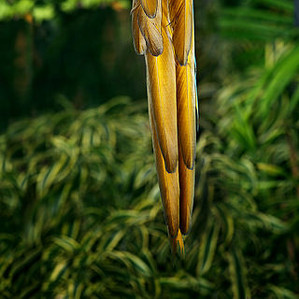

26.51% : jacamar
10.56% : grasshopper
 3.58% : chime
 2.15% : bulbul
 1.93% : fountain pen
 1.64% : leafhopper
 1.31% : kite
 1.22% : cricket
 1.09% : macaw
 0.81% : bee eater


In [23]:
classify(image_path="images/parrot_cropped3.jpg")

## Parrot (Padded Image)

The best way to input images to this Inception model, is to pad the image so it is square and then resize the image to 299 x 299 pixels, like this example of the parrot which is classified correctly with a score of about 97%.

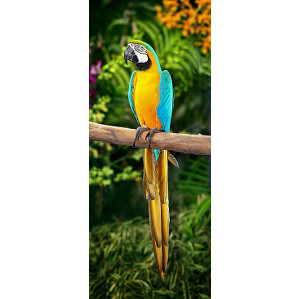

96.87% : macaw
 0.06% : African grey
 0.06% : toucan
 0.05% : bee eater
 0.04% : sulphur-crested cockatoo
 0.03% : king penguin
 0.03% : jacamar
 0.03% : lorikeet
 0.01% : kite
 0.01% : anemone fish


In [24]:
classify(image_path="images/parrot_padded.jpg")

## Elon Musk (299 x 299 pixels)

This image shows the living legend and super-nerd-hero Elon Musk. But the Inception model is very confused about what the image shows, predicting that it maybe shows a sweatshirt (score about 17%) or an abaya (score about 16%). It also thinks the image might show a ping-pong ball (score about 3%) or a baseball (score about 2%). So the Inception model is confused and the classification scores are unreliable.

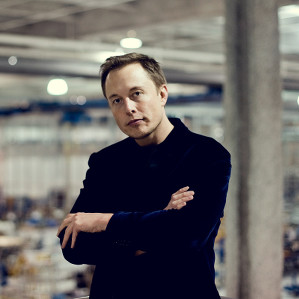

16.63% : sweatshirt
16.45% : abaya
 4.62% : suit
 3.40% : ping-pong ball
 2.89% : trench coat
 2.37% : baseball
 2.31% : cellular telephone
 1.99% : jersey
 1.42% : water bottle
 1.34% : dumbbell


In [25]:
classify(image_path="images/elon_musk.jpg")

## Elon Musk (100 x 100 pixels)

If we instead use a 100 x 100 pixels image of Elon Musk, then the Inception model thinks it might show a sweatshirt (score about 22%) or a cowboy boot (score about 14%). So now the Inception model has somewhat different predictions but it is still very confused.

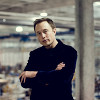

21.65% : sweatshirt
14.51% : cowboy boot
 9.11% : abaya
 8.70% : balance beam
 5.92% : suit
 5.65% : Loafer
 3.66% : trench coat
 1.75% : maillot
 1.44% : jersey
 1.44% : unicycle


In [26]:
classify(image_path="images/elon_musk_100x100.jpg")

The Inception model automatically upscales this image from 100 x 100 to 299 x 299 pixels, which is shown here. Note how pixelated and grainy it really is, although a human can easily see that this is a picture of a man with crossed arms.

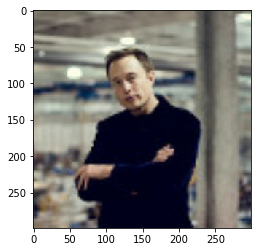

In [27]:
plot_resized_image(image_path="images/elon_musk_100x100.jpg")

## Willy Wonka (Gene Wilder)

This image shows the actor Gene Wilder portraying Willy Wonka in the 1971 version of the movie. The Inception model is very confident that the image shows a bow tie (score about 98%), which is true but a human would probably say this image shows a person.

The reason might be that the Inception model was trained on images of people with bow-ties that were classified as a bow-tie rather than a person. So maybe the problem is that the class-name should be "person with bow-tie" instead of just "bow-tie".

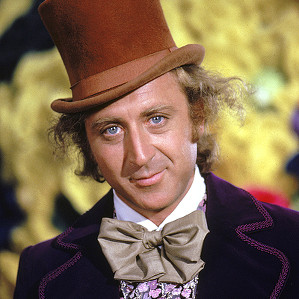

97.98% : bow tie
 0.63% : cowboy hat
 0.14% : sombrero
 0.07% : suit
 0.05% : bolo tie
 0.04% : Windsor tie
 0.03% : cornet
 0.02% : flute
 0.02% : banjo
 0.01% : revolver


In [28]:
classify(image_path="images/willy_wonka_old.jpg")

## Willy Wonka (Johnny Depp)

This image shows the actor Johnny Depp portraying Willy Wonka in the 2005 version of the movie. The Inception model thinks that this image shows "sunglasses" (score about 34%) or "sunglass" (score about 18%). Actually, the full name of the first class is "sunglasses, dark glasses, shades". For some reason the Inception model has been trained to recognize two very similar classes for sunglasses. Once again, it is correct that the image shows sunglasses, but a human would probably have said that this image shows a person.

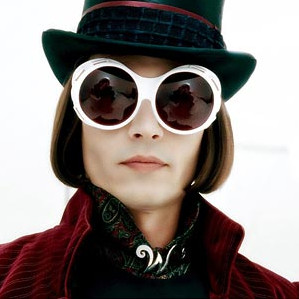

34.47% : sunglasses
18.10% : sunglass
 1.29% : velvet
 0.95% : wig
 0.85% : cowboy hat
 0.72% : sombrero
 0.64% : seat belt
 0.50% : jean
 0.44% : stole
 0.41% : poncho


In [29]:
classify(image_path="images/willy_wonka_new.jpg")

# Macbook

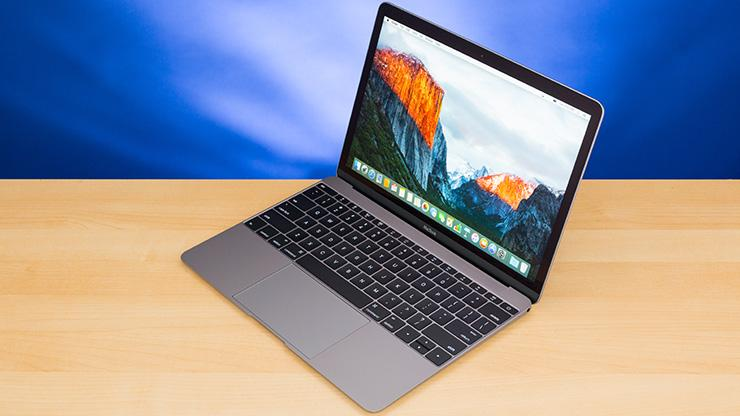

86.70% : notebook
 9.63% : laptop
 0.58% : solar dish
 0.17% : space bar
 0.11% : monitor
 0.10% : screen
 0.09% : book jacket
 0.08% : web site
 0.08% : desktop computer
 0.08% : desk


In [30]:
classify('../New/Macbook01.jpg')

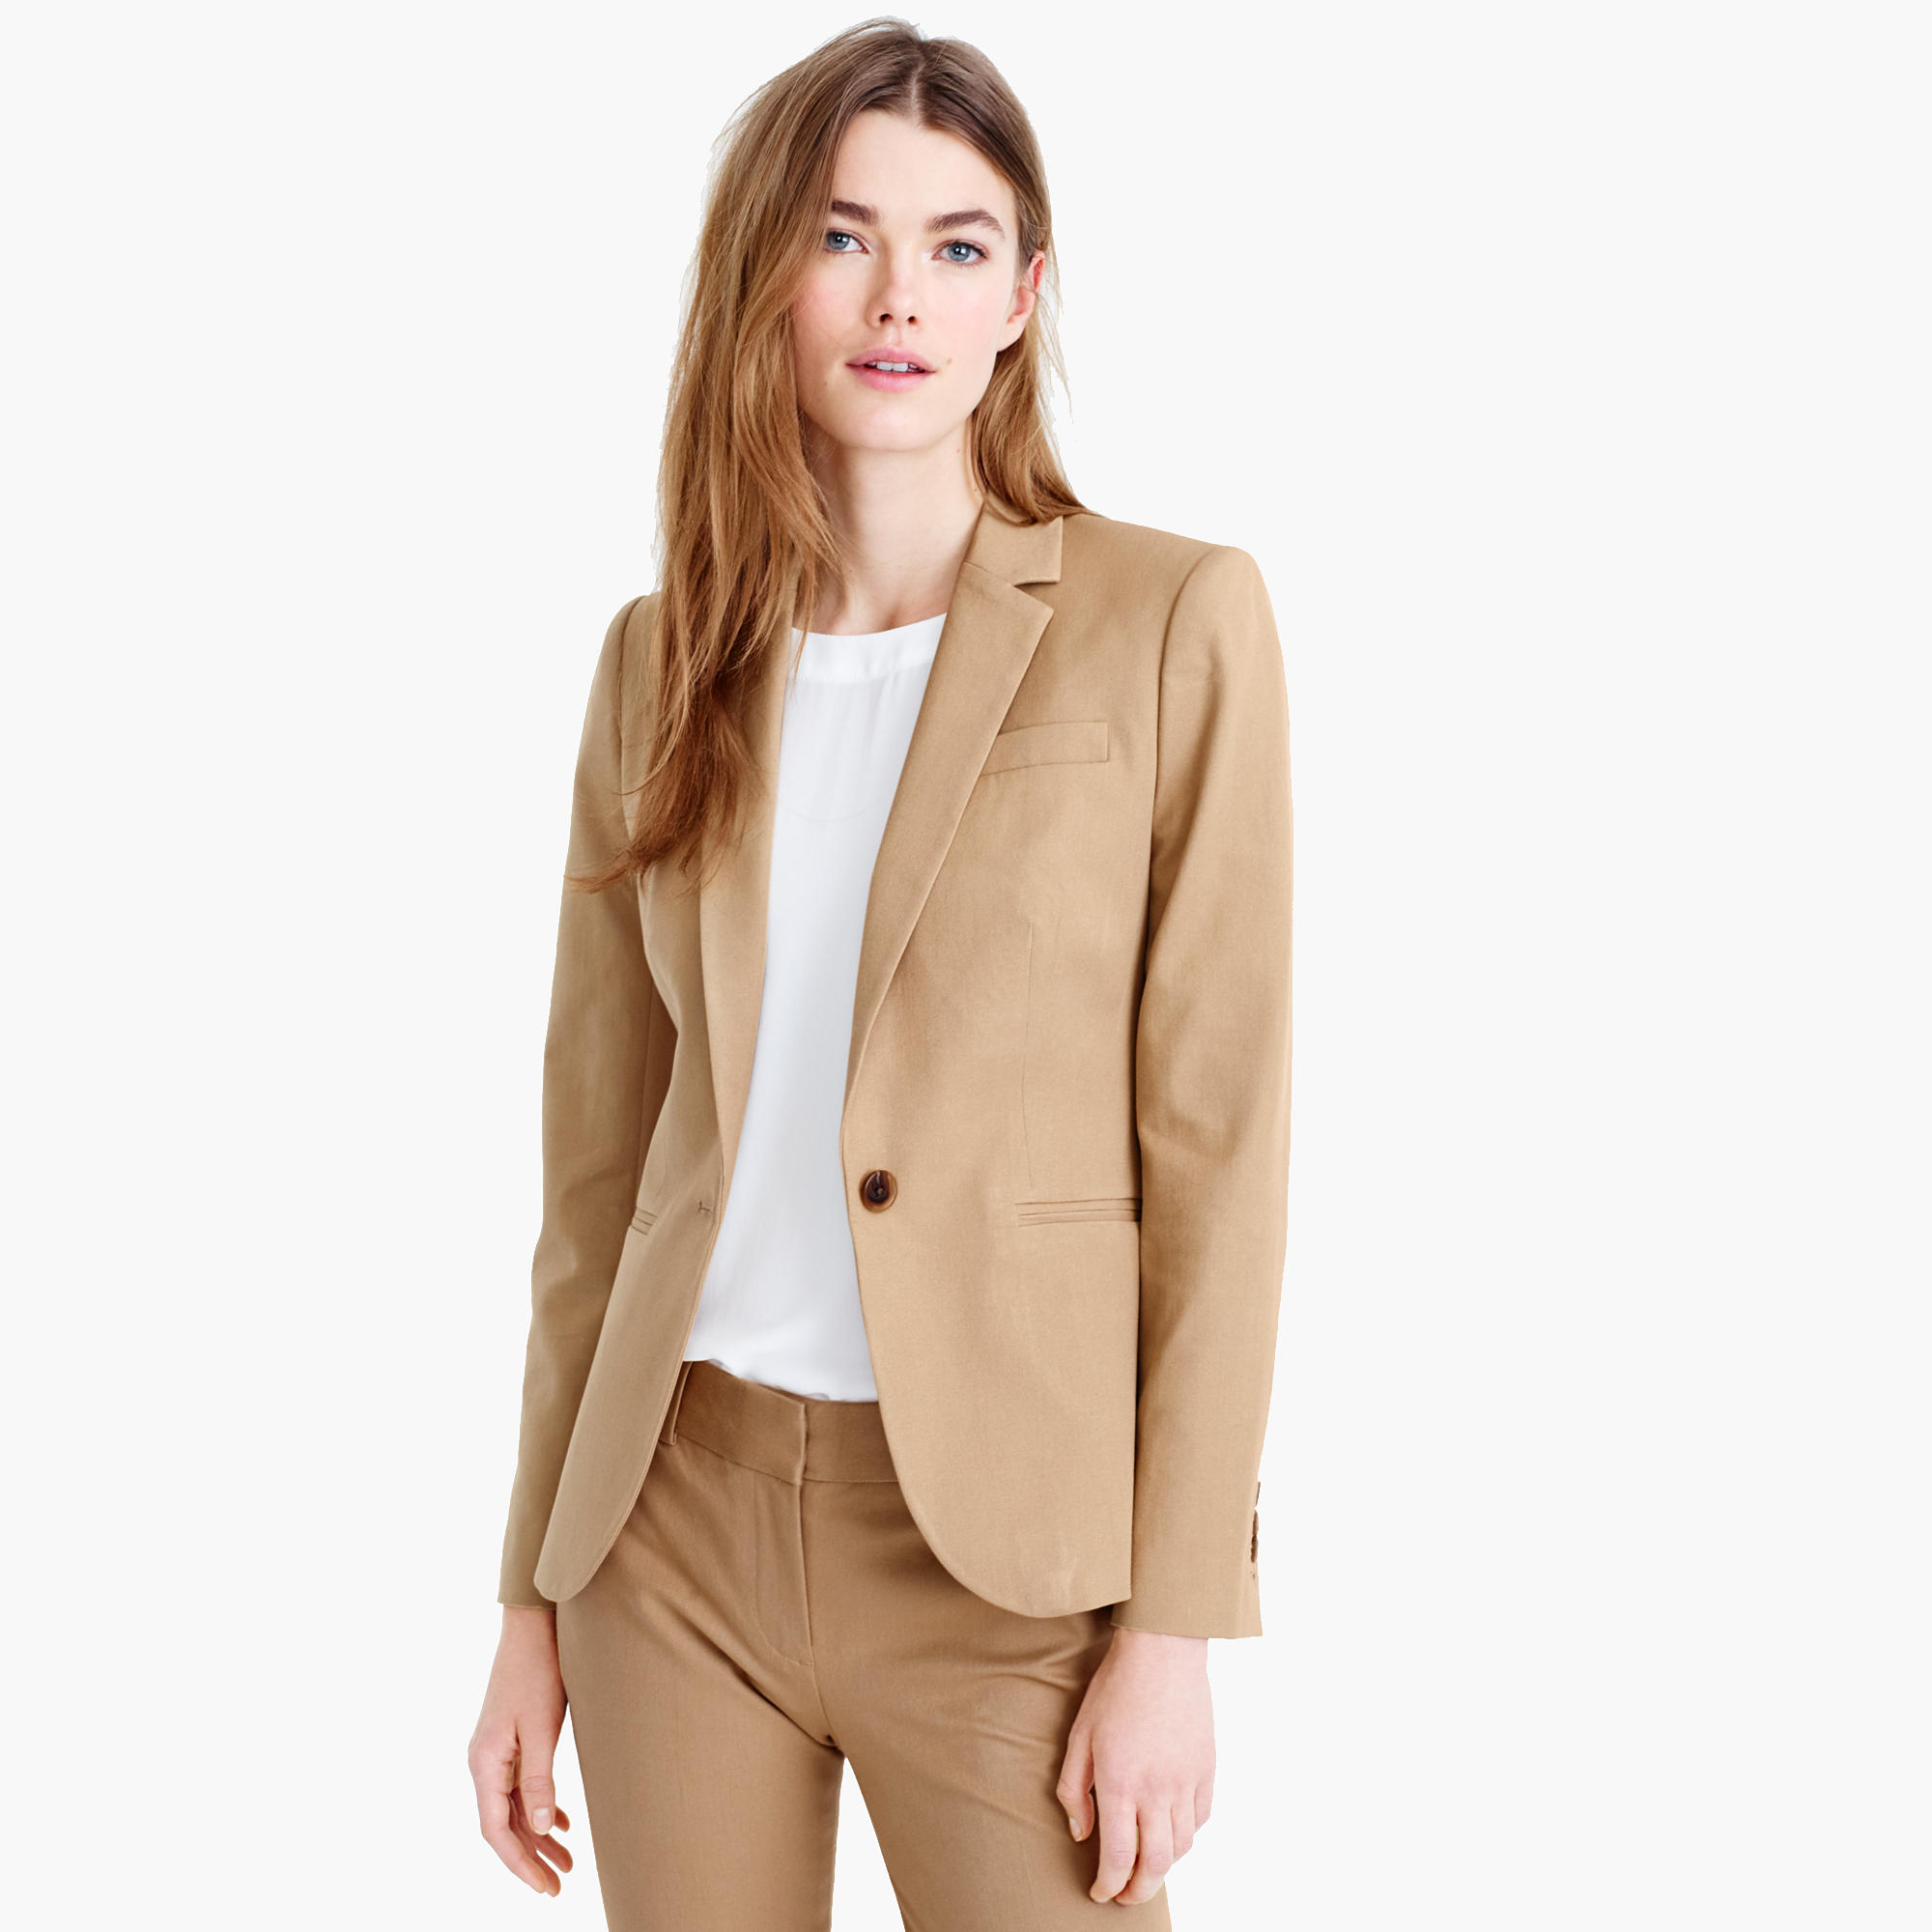

69.24% : suit
 8.43% : Windsor tie
 1.98% : bow tie
 0.92% : wool
 0.66% : cardigan
 0.58% : jean
 0.55% : Loafer
 0.44% : wig
 0.39% : buckle
 0.27% : pajama


In [31]:
classify('../New/Cloth1.jpg')

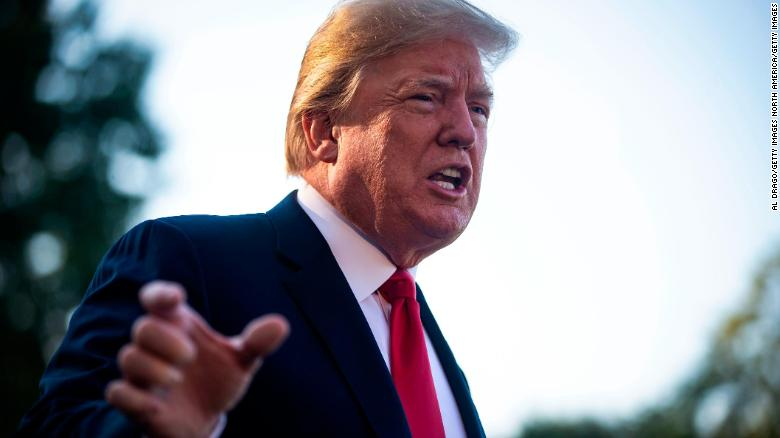

44.61% : suit
34.10% : Windsor tie
 2.97% : academic gown
 1.65% : groom
 0.77% : handkerchief
 0.71% : notebook
 0.47% : Loafer
 0.47% : bow tie
 0.42% : mortarboard
 0.39% : lab coat


In [34]:
classify('../New/People01.jpg')

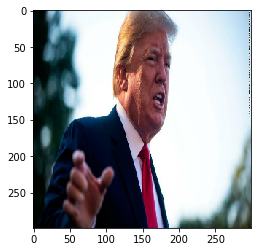

In [35]:
plot_resized_image('../New/People01.jpg')

## Close TensorFlow Session

We are now done using TensorFlow, so we close the session to release its resources. Note that the TensorFlow-session is inside the model-object, so we close the session through that object.

In [21]:
# This has been commented out in case you want to modify and experiment
# with the Notebook without having to restart it.
# model.close()

## Conclusion

This tutorial showed how to use the pre-trained Inception v3 model. It takes several weeks for a monster-computer to train the Inception model, but we can just download the finished model from the internet and use it on a normal PC for classifying images.

Unfortunately, the Inception model appears to have problems recognizing people. This may be due to the training-set that was used. Newer versions of the Inception model have already been released, but they are probably also trained on the same data-set and may therefore also have problems recognizing people. Future models will hopefully be trained to recognize common objects such as people.

In this tutorial we have hidden the TensorFlow implementation in the `inception.py` file because it is a bit messy and we may want to re-use it in future tutorials. Hopefully the TensorFlow developers will standardize and simplify the API for loading these pre-trained models more easily, so that anyone can use a powerful image classifier with just a few lines of code.

## Exercises

These are a few suggestions for exercises that may help improve your skills with TensorFlow. It is important to get hands-on experience with TensorFlow in order to learn how to use it properly.

You may want to backup this Notebook and the other files before making any changes.

* Use your own images, or images you find on the internet.
* Crop, resize and distort the images to see how it affects the classification accuracy.
* Add print-statements to various places in the code to see what data is being passed around in the code. You can also run and debug the `inception.py` file directly.
* Try and use one of the [newer models](https://research.googleblog.com/2016/08/improving-inception-and-image.html) that were just released. These are loaded in a different way than the Inception v3 model and may be more challenging to implement.
* Explain to a friend how the program works.

## License (MIT)

Copyright (c) 2016 by [Magnus Erik Hvass Pedersen](http://www.hvass-labs.org/)

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.